In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def rgb2gray(_img):
    img = _img.copy().astype(np.float)
    r = img[..., 2].copy()
    g = img[..., 1].copy()
    b = img[..., 0].copy()
    img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    img = img.astype(np.uint8)
    return img

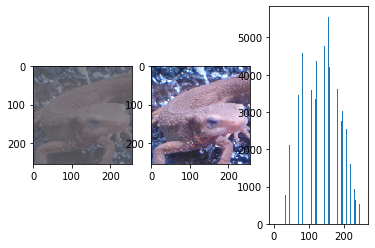

In [45]:
#21
def hist_normal(_img, a=0, b=255):
    img = _img.astype(np.float)
    out = np.zeros_like(img)
    c = np.min(img)
    d = np.max(img)
    
    out = (b - a) / (d - c) * (img - c) + a
    out = np.clip(out, a, b)
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori_dark.png')
img = img[..., ::-1]
result = hist_normal(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

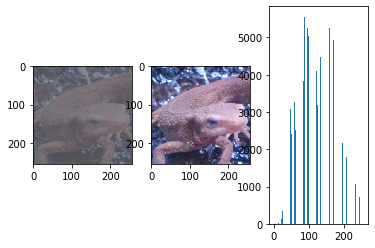

In [22]:
#22
def hist_mani(img, m0=128, s0=52):
    img = img.astype(np.float)
    out = np.zeros_like(img)
    m = np.mean(img)
    s = np.std(img)
    
    out = s0 / s * (img - m) + m0
    out = out.astype(np.uint8)
    return out

    
img = cv2.imread('imori_dark.png')
img = img[..., ::-1]
result = hist_mani(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

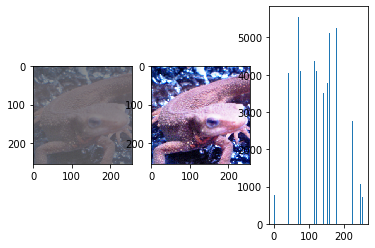

In [28]:
#23
def hist_equal(_img, z_max=255):
    img = _img.astype(np.float)
    out = np.zeros_like(img)
    h, w, c = img.shape
    s = h * w * c
    
    sum = 0
    for i in range(0, 255):
        idx = np.where(img == i)
        sum += len(img[idx])
        z = z_max / s * sum
        out[idx] = z
    
    out = out.astype(np.uint8)
    return out

    
img = cv2.imread('imori_dark.png')
img = img[..., ::-1]
result = hist_equal(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

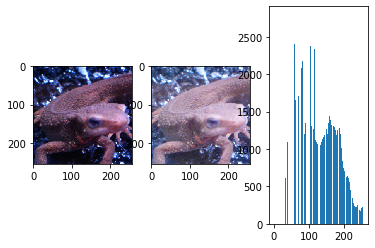

In [33]:
#24
def gamma_correction(_img, c=1, g=2.2):
    img = _img.astype(np.float)
    out = np.zeros_like(img)
    
    img /= 255
    out = (img / c)**(1/g)
    out *= 255
    
    out = out.astype(np.uint8)
    return out
    
img = cv2.imread('imori_gamma.png')
img = img[..., ::-1]
result = gamma_correction(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result)
plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

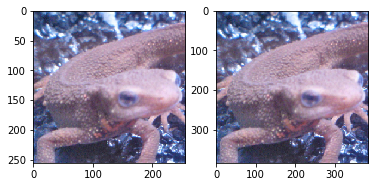

In [24]:
#25
def nearest_neighbor(img, a=1.5):
    h, w, c = img.shape
    x, y, z = int(h*a), int(w*a), c
    out = np.zeros((x, y, z))
    for i in range(1, x):
        for j in range(1, y):
            for k in range(c):
                out[i, j, k] = img[int(np.round(i/a)), int(np.round(j/a)), k]
    out = out.astype(np.uint8)
    return out
    

img = cv2.imread('imori.png')
img = img[..., ::-1]

result = nearest_neighbor(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

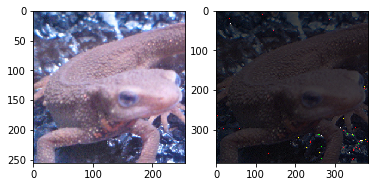

In [51]:
#26
def bi_linear(_img, a=1.5):
    img = _img.astype(np.float)
    h, w, c = img.shape
    x, y, z = int(h*a), int(w*a), c
    out = np.zeros((x, y, z))
    
    dx = np.zeros((2, 2))
    dy = np.zeros((2, 2))
    for i in range(x-1):
        for j in range(y-1):
            for k in range(z):
                xf, yf = i/a, j/a
                xi, yi = int(i/a), int(j/a)
                for m in range(2):
                    for n in range(2):
                        dx[m, n] = np.abs(xi+m-xf)
                        dy[m, n] = np.abs(yi+n-yf)
                dx = dx / np.sum(dx)
                dy = dy / np.sum(dy)
                sum = 0
                for m in range(2):
                    for n in range(2):
                        sum += (1-m-dx[m, n])*(1-n-dy[m, n])*img[xi+m, yi+n, k]
                out[i, j, k] = sum
                
    
    out = out.astype(np.uint8)
    return out
    
    
img = cv2.imread('imori.png')
img = img[..., ::-1]

result = bi_linear(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

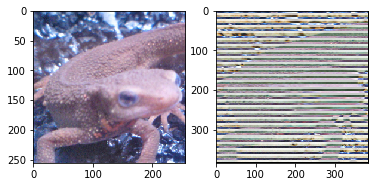

In [54]:
#27
def bi_cubic(_img, a=1.5):
    img = _img.astype(np.float)
    h, w, c = img.shape
    x, y, z = int(h*a), int(w*a), c
    out = np.zeros((x, y, z))
    
    dx = np.zeros((4, 4))
    dy = np.zeros((4 ,4))
    for i in range(x-2):
        for j in range(y-2):
            for k in range(z):
                xf, yf = i/a, j/a
                xi, yi = int(i/a), int(j/a)
                for m in range(-1, 2):
                    for n in range(-1, 2):
                        dx[m+1][n+1] = np.abs(xi+m-xf)
                        dy[m+1][n+1] = np.abs(yi+n-yf)
                idx = np.where(dx <= 1)
                dx[idx] = dx[idx]**3-2+dx[idx]**2+1
                idx = np.where(dy <= 1)
                dy[idx] = dy[idx]**3-2+dy[idx]**2+1
                idx = np.where((1 < dx) & (dx <= 2))
                dx[idx] = -dx[idx]**3+5*dx[idx]**2-8*dx[idx]+4
                idx = np.where((1 < dy) & (dy <= 2))
                dy[idx] = -dy[idx]**3+5*dy[idx]**2-8*dy[idx]+4

                sum = 0
                for m in range(4):
                    for n in range(4):
                        sum += dx[m][n]*dy[m][n]
                for m in range(-1, 2):
                    for n in range(-1, 2):
                        out[i, j, k] = img[xi+m, yi+n, k] * dx[m+1, n+1]                
    
    out = out.astype(np.uint8)
    return out
    
    
    
img = cv2.imread('imori.png')
img = img[..., ::-1]

result = bi_cubic(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

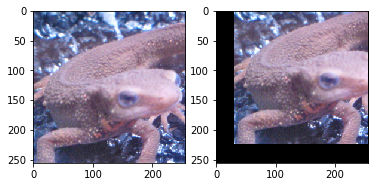

In [64]:
#28
def translation(img, tx=30, ty=-30):
    out = np.zeros_like(img)
    h, w, c = img.shape
    
    w_min = np.max([tx, 0])
    h_min = np.max([ty, 0])
    w_max = np.min([tx+w-1, w-1])
    h_max = np.min([ty+h-1, h-1])
    
    out[h_min:h_max, w_min:w_max] = img[h_min-ty:h_max-ty, w_min-tx:w_max-tx]
    
    return out


img = cv2.imread('imori.png')
img = img[..., ::-1]

result = translation(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

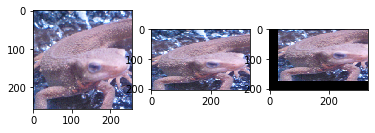

In [77]:
#29
def zoom(img, a=1.3, b=0.8):
    h, w, c = img.shape
    bh, aw = int(b*h), int(a*w)
    out = np.zeros((bh, aw, c))
    
    for i in range(bh):
        for j in range(aw):
            for k in range(c):
                out[i, j, k] = img[int(np.round(i/b)), int(np.round(j/a)), k]
    
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.png')
img = img[..., ::-1]

result1 = zoom(img)
result2 = translation(result1)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result1)
plt.subplot(1, 3, 3)
plt.imshow(result2)
plt.show()

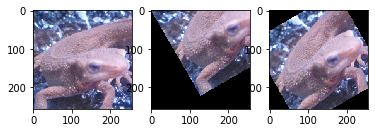

In [93]:
#30
def rotate_origin(img, deg=30):
    h, w, c = img.shape
    d = deg / 360 * 2 * np.pi
    out = np.zeros_like(img)
    
    for i in range(h):
        for j in range(w):
            for k in range(c):
                x, y = int(np.round(i*np.cos(d)+j*np.sin(d))), int(np.round(-i*np.sin(d)+j*np.cos(d)))
                if x < 0 or 255 < x or y < 0 or 255 < y:
                    continue
                out[i, j, k] = img[x, y, k]
    
    out = out.astype(np.uint8)
    return out

def rotate_center(img, deg=30):
    h, w, c = img.shape
    d = deg / 360 * 2 * np.pi
    out = np.zeros_like(img)
    
    for i in range(h):
        for j in range(w):
            for k in range(c):
                x, y = i-int(w/2), j-int(h/2)
                x, y = int(np.round(x*np.cos(d)+y*np.sin(d))), int(np.round(-x*np.sin(d)+y*np.cos(d)))
                x, y = x+int(w/2), y+int(h/2)
                if x < 0 or 255 < x or y < 0 or 255 < y:
                    continue
                out[i, j, k] = img[x, y, k]
    
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.png')
img = img[..., ::-1]

result1 = rotate_origin(img)
result2 = rotate_center(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result1)
plt.subplot(1, 3, 3)
plt.imshow(result2)
plt.show()